In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
import sklearn.metrics as metrics
from sklearn.compose import ColumnTransformer

In [2]:
mxmh = pd.read_csv('C:/Users/blain/Desktop/DSC680/mxmh_survey_results.csv')
pd.set_option('display.max_columns', None)

In [3]:
mxmh

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [4]:
mxmh_cleaned = mxmh[['Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
mxmh_cleaned

,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,3.0,Yes,Yes,Yes,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,1.5,Yes,No,No,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,4.0,No,No,No,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,2.5,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,4.0,Yes,No,No,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,1.0,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,6.0,Yes,No,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,5.0,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [5]:
mxmh_cleaned['Highest Mental Health'] = mxmh_cleaned[['Anxiety', 'Depression', 'Insomnia', 'OCD']].max(axis=1)
mxmh_cleaned['Overall Mental Health'] = mxmh_cleaned[['Anxiety', 'Depression', 'Insomnia', 'OCD']].sum(axis=1)
mxmh_cleaned['Overall Mental Health Categories'] = np.select([(mxmh_cleaned['Overall Mental Health'] <= 12),(mxmh_cleaned['Overall Mental Health'] > 12) & (mxmh_cleaned['Overall Mental Health'] <= 27),(mxmh_cleaned['Overall Mental Health'] > 27)], ['Good','Fair','Poor'])

C:\Users\blain\AppData\Local\Temp\ipykernel_13112\803055785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxmh_cleaned['Highest Mental Health'] = mxmh_cleaned[['Anxiety', 'Depression', 'Insomnia', 'OCD']].max(axis=1)
C:\Users\blain\AppData\Local\Temp\ipykernel_13112\803055785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxmh_cleaned['Overall Mental Health'] = mxmh_cleaned[['Anxiety', 'Depression', 'Insomnia', 'OCD']].sum(axis=1)
C:\Users\blain\AppData\Local\Temp\ipykernel_13112\803055785.py:3: 

In [6]:
mxmh_cleaned

,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories
0,3.0,Yes,Yes,Yes,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,3.0,4.0,Good
1,1.5,Yes,No,No,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,7.0,12.0,Good
2,4.0,No,No,No,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,10.0,26.0,Fair
3,2.5,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,9.0,22.0,Fair
4,4.0,Yes,No,No,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,9.0,23.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,9.0,22.0,Fair
732,1.0,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,5.0,12.0,Good
733,6.0,Yes,No,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,2.0,8.0,Good
734,5.0,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,3.0,8.0,Good


In [7]:
remap = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
mxmh_cleaned = mxmh_cleaned.replace({'Frequency [Classical]' : remap, 'Frequency [Country]' : remap, 'Frequency [EDM]' : remap, 'Frequency [Folk]' : remap, 'Frequency [Gospel]' : remap, 'Frequency [Hip hop]' : remap, 'Frequency [Jazz]' : remap, 'Frequency [K pop]' : remap, 'Frequency [Latin]' : remap, 'Frequency [Lofi]' : remap, 'Frequency [Metal]' : remap, 'Frequency [Pop]' : remap, 'Frequency [R&B]' : remap, 'Frequency [Rap]' : remap, 'Frequency [Rock]' : remap, 'Frequency [Video game music]': remap})
mxmh_cleaned

,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories
0,3.0,Yes,Yes,Yes,Latin,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0,3.0,4.0,Good
1,1.5,Yes,No,No,Rock,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0,7.0,12.0,Good
2,4.0,No,No,No,Video game music,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,10.0,26.0,Fair
3,2.5,Yes,No,Yes,Jazz,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,9.0,22.0,Fair
4,4.0,Yes,No,No,R&B,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,9.0,23.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,Rock,3,1,0,2,0,2,1,0,2,1,1,3,0,1,3,0,7.0,6.0,0.0,9.0,9.0,22.0,Fair
732,1.0,Yes,Yes,No,Pop,1,1,0,0,0,0,1,0,0,1,0,3,0,0,2,2,3.0,2.0,2.0,5.0,5.0,12.0,Good
733,6.0,Yes,No,Yes,Rap,1,2,2,1,1,3,1,1,1,2,1,2,2,2,1,1,2.0,2.0,2.0,2.0,2.0,8.0,Good
734,5.0,Yes,Yes,No,Classical,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2.0,3.0,2.0,1.0,3.0,8.0,Good


In [8]:
mxmh_cleaned['Non-zero Genres'] = mxmh_cleaned[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']].astype(bool).sum(axis=1)
mxmh_cleaned['Total Genre Score'] = mxmh_cleaned[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']].sum(axis=1)
mxmh_cleaned

,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories,Non-zero Genres,Total Genre Score
0,3.0,Yes,Yes,Yes,Latin,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0,3.0,4.0,Good,10,21
1,1.5,Yes,No,No,Rock,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0,7.0,12.0,Good,13,22
2,4.0,No,No,No,Video game music,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,10.0,26.0,Fair,10,18
3,2.5,Yes,No,Yes,Jazz,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,9.0,22.0,Fair,9,19
4,4.0,Yes,No,No,R&B,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,9.0,23.0,Fair,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,Rock,3,1,0,2,0,2,1,0,2,1,1,3,0,1,3,0,7.0,6.0,0.0,9.0,9.0,22.0,Fair,11,20
732,1.0,Yes,Yes,No,Pop,1,1,0,0,0,0,1,0,0,1,0,3,0,0,2,2,3.0,2.0,2.0,5.0,5.0,12.0,Good,7,11
733,6.0,Yes,No,Yes,Rap,1,2,2,1,1,3,1,1,1,2,1,2,2,2,1,1,2.0,2.0,2.0,2.0,2.0,8.0,Good,16,24
734,5.0,Yes,Yes,No,Classical,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2.0,3.0,2.0,1.0,3.0,8.0,Good,3,6


In [9]:
mxmh_cleaned[mxmh_cleaned.isnull().any(axis=1)]

,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories,Non-zero Genres,Total Genre Score
57,0.0,NaN,No,No,Rock,1,1,0,0,0,0,1,0,0,0,2,1,1,0,2,2,9.0,0.0,10.0,0.0,10.0,19.0,Fair,8,11
223,12.0,Yes,NaN,No,K pop,0,0,0,0,0,2,0,3,2,0,1,3,2,2,1,0,3.0,7.0,5.0,2.0,7.0,17.0,Fair,8,16
408,3.0,Yes,NaN,Yes,Classical,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,7.0,9.0,2.0,9.0,26.0,Fair,1,3
426,13.0,NaN,No,No,K pop,2,0,1,2,0,2,2,3,3,1,1,3,3,2,3,2,10.0,10.0,10.0,7.0,10.0,37.0,Poor,14,30
561,1.0,NaN,NaN,NaN,K pop,1,1,2,1,0,3,1,3,1,1,2,3,2,2,3,1,4.0,5.0,2.0,5.0,5.0,16.0,Fair,15,27
572,3.0,Yes,NaN,No,Video game music,2,0,0,0,0,0,2,1,0,3,0,1,2,0,0,3,7.0,0.0,3.0,1.0,7.0,11.0,Good,7,14


The only columns with NaN values relate to how much a person immerses themselves in music. Row 57 can be safely assumed to be "No" as the person indicated they listen to 0 hours of music daily. The other 5 will be dropped from the data for the model using those columns only as there is no good way to determine the correct value with a high level of certainty for these.

In [10]:
mxmh_immersion = mxmh_cleaned[['Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Highest Mental Health', 'Overall Mental Health', 'Overall Mental Health Categories']]
mxmh_immersion

,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories
0,3.0,Yes,Yes,Yes,3.0,0.0,1.0,0.0,3.0,4.0,Good
1,1.5,Yes,No,No,7.0,2.0,2.0,1.0,7.0,12.0,Good
2,4.0,No,No,No,7.0,7.0,10.0,2.0,10.0,26.0,Fair
3,2.5,Yes,No,Yes,9.0,7.0,3.0,3.0,9.0,22.0,Fair
4,4.0,Yes,No,No,7.0,2.0,5.0,9.0,9.0,23.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,7.0,6.0,0.0,9.0,9.0,22.0,Fair
732,1.0,Yes,Yes,No,3.0,2.0,2.0,5.0,5.0,12.0,Good
733,6.0,Yes,No,Yes,2.0,2.0,2.0,2.0,2.0,8.0,Good
734,5.0,Yes,Yes,No,2.0,3.0,2.0,1.0,3.0,8.0,Good


In [11]:
mxmh_immersion[['While working']] = mxmh_immersion[['While working']].fillna('No')
mxmh_immersion = mxmh_immersion.drop([223, 408, 426, 561, 572])
mxmh_immersion

C:\Users\blain\AppData\Local\Temp\ipykernel_13112\2978718460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxmh_immersion[['While working']] = mxmh_immersion[['While working']].fillna('No')


,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Highest Mental Health,Overall Mental Health,Overall Mental Health Categories
0,3.0,Yes,Yes,Yes,3.0,0.0,1.0,0.0,3.0,4.0,Good
1,1.5,Yes,No,No,7.0,2.0,2.0,1.0,7.0,12.0,Good
2,4.0,No,No,No,7.0,7.0,10.0,2.0,10.0,26.0,Fair
3,2.5,Yes,No,Yes,9.0,7.0,3.0,3.0,9.0,22.0,Fair
4,4.0,Yes,No,No,7.0,2.0,5.0,9.0,9.0,23.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...
731,2.0,Yes,Yes,No,7.0,6.0,0.0,9.0,9.0,22.0,Fair
732,1.0,Yes,Yes,No,3.0,2.0,2.0,5.0,5.0,12.0,Good
733,6.0,Yes,No,Yes,2.0,2.0,2.0,2.0,2.0,8.0,Good
734,5.0,Yes,Yes,No,2.0,3.0,2.0,1.0,3.0,8.0,Good


In [12]:
preference_x = mxmh_cleaned[['Fav genre', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']]
diversity_x = mxmh_cleaned[['Non-zero Genres', 'Total Genre Score']]
immersion_x = mxmh_immersion[['Hours per day', 'While working', 'Instrumentalist', 'Composer']]

y = mxmh_cleaned[['Overall Mental Health Categories', 'Highest Mental Health']]
immersion_y = mxmh_immersion[['Overall Mental Health Categories', 'Highest Mental Health']]

In [13]:
preference_x_train, preference_x_test, preference_y_train, preference_y_test = train_test_split(preference_x, y, test_size=0.33)
diversity_x_train, diversity_x_test, diversity_y_train, diversity_y_test = train_test_split(diversity_x, y, test_size=0.33)
immersion_x_train, immersion_x_test, immersion_y_train, immersion_y_test = train_test_split(immersion_x, immersion_y, test_size=0.33)

In [14]:
immersion_categorical = ['While working', 'Instrumentalist', 'Composer']
immersion_continuous = ['Hours per day']

In [15]:
Preference_Scaler = OneHotEncoder()
Diversity_Scaler = StandardScaler()

preference_x_train = Preference_Scaler.fit_transform(preference_x_train)
preference_x_test = Preference_Scaler.transform(preference_x_test)

diversity_x_train = Diversity_Scaler.fit_transform(diversity_x_train)
diversity_x_test = Diversity_Scaler.transform(diversity_x_test)

In [16]:
Preference_Overall_Model = LogisticRegression()
Preference_Overall_Model.fit(preference_x_train, preference_y_train['Overall Mental Health Categories'])

LogisticRegression()

In [17]:
metrics.accuracy_score(preference_y_test['Overall Mental Health Categories'], Preference_Overall_Model.predict(preference_x_test))

0.4732510288065844

In [18]:
metrics.confusion_matrix(preference_y_test['Overall Mental Health Categories'], Preference_Overall_Model.predict(preference_x_test))

array([[94, 29,  5],
       [68, 19,  4],
       [20,  2,  2]], dtype=int64)

In [19]:
print(metrics.classification_report(preference_y_test['Overall Mental Health Categories'], Preference_Overall_Model.predict(preference_x_test)))

              precision    recall  f1-score   support

        Fair       0.52      0.73      0.61       128
        Good       0.38      0.21      0.27        91
        Poor       0.18      0.08      0.11        24

    accuracy                           0.47       243
   macro avg       0.36      0.34      0.33       243
weighted avg       0.43      0.47      0.43       243



In [20]:
Preference_Highest_Model = LinearRegression()
Preference_Highest_Model.fit(preference_x_train, preference_y_train['Highest Mental Health'])

LinearRegression()

In [21]:
metrics.mean_squared_error(preference_y_test['Highest Mental Health'], Preference_Highest_Model.predict(preference_x_test))

7.422171111709662

In [22]:
metrics.r2_score(preference_y_test['Highest Mental Health'], Preference_Highest_Model.predict(preference_x_test))

-0.19243999862694294

In [23]:
Diversity_Overall_Model = LogisticRegression()
Diversity_Overall_Model.fit(diversity_x_train, diversity_y_train['Overall Mental Health Categories'])

LogisticRegression()

In [24]:
metrics.accuracy_score(diversity_y_test['Overall Mental Health Categories'], Diversity_Overall_Model.predict(diversity_x_test))

0.5761316872427984

In [25]:
metrics.confusion_matrix(diversity_y_test['Overall Mental Health Categories'], Diversity_Overall_Model.predict(diversity_x_test))

array([[140,   0,   0],
       [ 79,   0,   0],
       [ 24,   0,   0]], dtype=int64)

In [26]:
print(metrics.classification_report(diversity_y_test['Overall Mental Health Categories'], Diversity_Overall_Model.predict(diversity_x_test)))

              precision    recall  f1-score   support

        Fair       0.58      1.00      0.73       140
        Good       0.00      0.00      0.00        79
        Poor       0.00      0.00      0.00        24

    accuracy                           0.58       243
   macro avg       0.19      0.33      0.24       243
weighted avg       0.33      0.58      0.42       243



C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
Diversity_Highest_Model = LinearRegression()
Diversity_Highest_Model.fit(diversity_x_train, diversity_y_train['Highest Mental Health'])

LinearRegression()

In [28]:
metrics.mean_squared_error(diversity_y_test['Highest Mental Health'], Diversity_Highest_Model.predict(diversity_x_test))

6.3122232079698835

In [29]:
metrics.r2_score(diversity_y_test['Highest Mental Health'], Diversity_Highest_Model.predict(diversity_x_test))

0.011655340105392709

In [36]:
immersion_ct = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), immersion_categorical)], remainder=StandardScaler())
immersion_x_train_trans = immersion_ct.fit_transform(immersion_x_train)
immersion_x_test_trans = immersion_ct.transform(immersion_x_test)

In [37]:
Immersion_Overall_Model = LogisticRegression()
Immersion_Overall_Model.fit(immersion_x_train_trans, immersion_y_train['Overall Mental Health Categories'])

LogisticRegression()

In [38]:
metrics.accuracy_score(immersion_y_test['Overall Mental Health Categories'], Immersion_Overall_Model.predict(immersion_x_test_trans))

0.5495867768595041

In [39]:
metrics.confusion_matrix(immersion_y_test['Overall Mental Health Categories'], Immersion_Overall_Model.predict(immersion_x_test_trans))

array([[129,  11,   0],
       [ 68,   4,   0],
       [ 29,   1,   0]], dtype=int64)

In [40]:
print(metrics.classification_report(immersion_y_test['Overall Mental Health Categories'], Immersion_Overall_Model.predict(immersion_x_test_trans)))

              precision    recall  f1-score   support

        Fair       0.57      0.92      0.70       140
        Good       0.25      0.06      0.09        72
        Poor       0.00      0.00      0.00        30

    accuracy                           0.55       242
   macro avg       0.27      0.33      0.27       242
weighted avg       0.40      0.55      0.43       242



C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
Immersion_Highest_Model = LinearRegression()
Immersion_Highest_Model.fit(immersion_x_train_trans, immersion_y_train['Highest Mental Health'])

LinearRegression()

In [42]:
metrics.mean_squared_error(immersion_y_test['Highest Mental Health'], Immersion_Highest_Model.predict(immersion_x_test_trans))

6.509851376872417

In [43]:
metrics.r2_score(immersion_y_test['Highest Mental Health'], Immersion_Highest_Model.predict(immersion_x_test_trans))

0.004496661483017417

<AxesSubplot:xlabel='Fav genre'>

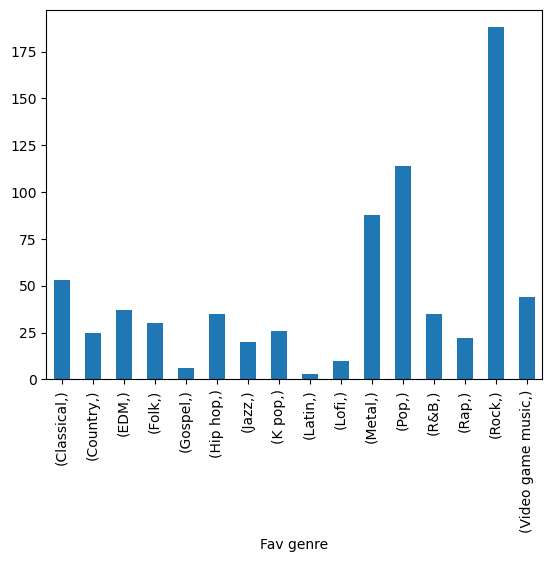

In [58]:
mxmh_cleaned[['Fav genre']].value_counts(sort=False).plot.bar()

<AxesSubplot:>

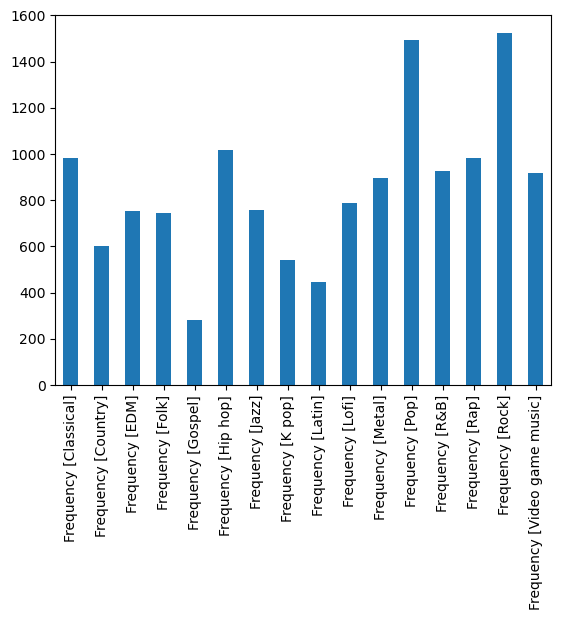

In [48]:
mxmh_cleaned[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']].sum().plot.bar()

<AxesSubplot:ylabel='Frequency'>

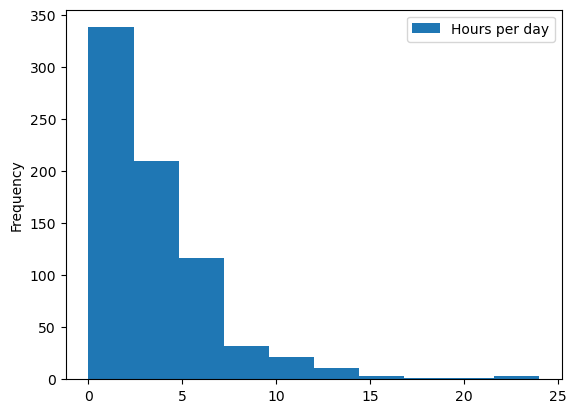

In [59]:
mxmh_cleaned[['Hours per day']].plot.hist()